In [10]:
import os
import settings
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc.xls"), encoding="ISO-8859-1")
    return df

def calculate_sentiment_change_by_halves():
    df['posemo_change_h'] = df['posemo_2h'] - df['posemo_1h']
    df['negemo_change_h'] = df['negemo_2h'] - df['negemo_1h']
    df['affect_change_h'] = df['posemo_change_h'] + df['negemo_change_h']
    return df

def calculate_sentiment_change_by_quarters():
    df['posemo_change_q'] = df['posemo_4q'] - df['posemo_1q']
    df['negemo_change_q'] = df['negemo_4q'] - df['negemo_1q']
    df['affect_change_q'] = df['posemo_change_q'] + df['negemo_change_q']
    return df

def create_published_year():
    df['published_date_dt'] = pd.to_datetime(df['published_date'])
    df['published_dt'] = pd.to_datetime(df['published_date'],unit='s')
    df['published_year'] = df['published_dt'].dt.year
    return df

def create_moral_category_from_subsets():
    df['Harm'] = df['HarmVirtue'] + df['HarmVice']
    df['Fairness'] = df['FairnessVirtue'] + df['FairnessVice']
    df['Purity'] = df['PurityVirtue'] + df['PurityVice']
    df['Ingroup'] = df['IngroupVirtue'] + df['IngroupVice']
    df['Authority'] = df['AuthorityVirtue'] + df['AuthorityVice']
    return df

In [23]:
    df = read_data()
    df = calculate_sentiment_change_by_halves()
    df = calculate_sentiment_change_by_quarters()
    df = create_published_year()
    df = create_moral_category_from_subsets()

In [24]:
df.describe()

,index,comments,duration,film_date,languages,published_date,views,music,conversation,persuasive,...,affect_change_h,posemo_change_q,negemo_change_q,affect_change_q,published_year,Harm,Fairness,Purity,Ingroup,Authority
count,2406.000000,2406.000000,2406.000000,2.406000e+03,2406.000000,2.406000e+03,2.406000e+03,2406.0,2406.0,2406.000000,...,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,1324.549460,190.829593,817.572735,1.329956e+09,27.811721,1.349816e+09,1.729881e+06,0.0,0.0,227.012469,...,0.407618,0.827951,-0.088637,0.739314,2012.279302,0.235216,0.059426,0.089626,0.302174,0.228707
std,759.601419,287.597828,317.235130,1.168127e+08,8.708629,9.748147e+07,2.538130e+06,0.0,0.0,474.982792,...,1.408368,1.658661,1.302998,2.169626,3.089538,0.307555,0.120688,0.171869,0.295942,0.258494
min,0.000000,2.000000,135.000000,4.445280e+08,1.000000,1.151367e+09,1.558950e+05,0.0,0.0,0.000000,...,-10.430000,-10.240000,-5.860000,-14.630000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,666.250000,60.000000,587.000000,1.265760e+09,23.000000,1.271672e+09,7.902392e+05,0.0,0.0,41.250000,...,-0.420000,-0.130000,-0.710000,-0.490000,2010.000000,0.040000,0.000000,0.000000,0.100000,0.070000
50%,1347.000000,115.500000,848.500000,1.340582e+09,28.000000,1.349190e+09,1.139610e+06,0.0,0.0,101.000000,...,0.340000,0.740000,-0.010000,0.680000,2012.000000,0.140000,0.000000,0.040000,0.220000,0.170000
75%,1980.750000,220.000000,1040.000000,1.426464e+09,33.000000,1.432199e+09,1.707174e+06,0.0,0.0,232.750000,...,1.200000,1.710000,0.530000,1.830000,2015.000000,0.317500,0.070000,0.110000,0.410000,0.300000
max,2627.000000,6404.000000,2678.000000,1.510618e+09,72.000000,1.512749e+09,4.722711e+07,0.0,0.0,10704.000000,...,16.080000,25.000000,25.000000,50.000000,2017.000000,3.230000,1.780000,2.570000,2.000000,2.950000


In [25]:
df['posemo_change_q'].describe()

count    2406.000000
mean        0.827951
std         1.658661
min       -10.240000
25%        -0.130000
50%         0.740000
75%         1.710000
max        25.000000
Name: posemo_change_q, dtype: float64

In [26]:
df['negemo_change_q'].describe()

count    2406.000000
mean       -0.088637
std         1.302998
min        -5.860000
25%        -0.710000
50%        -0.010000
75%         0.530000
max        25.000000
Name: negemo_change_q, dtype: float64

In [27]:
df['affect_change_q'].describe()

count    2406.000000
mean        0.739314
std         2.169626
min       -14.630000
25%        -0.490000
50%         0.680000
75%         1.830000
max        50.000000
Name: affect_change_q, dtype: float64

In [28]:

df.tail()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,published_date,...,negemo_change_q,affect_change_q,published_date_dt,published_dt,published_year,Harm,Fairness,Purity,Ingroup,Authority
2623,2623,12,Anna Heringer: The warmth and wisdom of mud bu...,781,TED2017,1492992000,8,Anna Heringer,Anna Heringer: The warmth and wisdom of mud bu...,1506609881,...,0.22,1.07,1970-01-01 00:00:01.506609881,2017-09-28 14:44:41,2017,0.17,0.06,0.40,0.23,0.40
2624,2624,21,Julio Gil: Future tech will give you the benef...,667,TED@UPS,1500508800,14,Julio Gil,Julio Gil: Future tech will give you the benef...,1506524207,...,-1.02,0.29,1970-01-01 00:00:01.506524207,2017-09-27 14:56:47,2017,0.00,0.06,0.00,0.25,0.13
2625,2625,19,Nabila Alibhai: Why people of different faiths...,711,TEDGlobal 2017,1503792000,9,Nabila Alibhai,Nabila Alibhai: Why people of different faiths...,1506456019,...,-4.46,-1.66,1970-01-01 00:00:01.506456019,2017-09-26 20:00:19,2017,0.50,0.24,0.31,2.00,0.19
2626,2626,22,Mei Lin Neo: The fascinating secret lives of g...,327,TED2017,1492992000,18,Mei Lin Neo,Mei Lin Neo: The fascinating secret lives of g...,1506437715,...,1.15,5.16,1970-01-01 00:00:01.506437715,2017-09-26 14:55:15,2017,0.86,0.00,0.00,0.28,0.43
2627,2627,21,Anindya Kundu: The boost students need to over...,425,TED Residency,1496707200,15,Anindya Kundu,Anindya Kundu: The boost students need to over...,1506352216,...,-0.35,-1.72,1970-01-01 00:00:01.506352216,2017-09-25 15:10:16,2017,0.26,0.00,0.00,0.52,0.43


In [83]:
df.to_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")

In [117]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [97]:
pos_means= df[['posemo_1q', 'posemo_2q','posemo_3q','posemo_4q']].mean()

In [98]:
neg_means = df[['negemo_1q', 'negemo_2q','negemo_3q','negemo_4q']].mean()

In [ ]:
x=[1,2,3,4]

In [115]:
pos_means

posemo_1q    2.342847
posemo_2q    2.376887
posemo_3q    2.471883
posemo_4q    3.170798
dtype: float64

In [116]:
neg_means

negemo_1q    1.329933
negemo_2q    1.310977
negemo_3q    1.287797
negemo_4q    1.241297
dtype: float64

Saving figure positive_sentiment_by_transcript_quarter


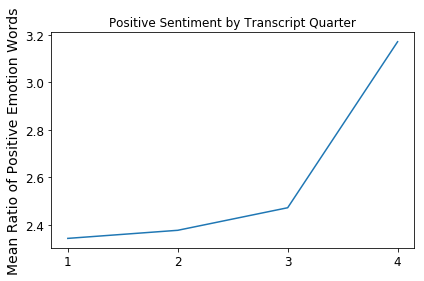

In [121]:
plt.plot(x,pos_means)
plt.ylabel("Mean Ratio of Positive Emotion Words")
plt.title("Positive Sentiment by Transcript Quarter")
plt.xticks([1,2,3,4])
save_fig("positive_sentiment_by_transcript_quarter")
plt.show()

Saving figure negative_sentiment_by_transcript_quarter


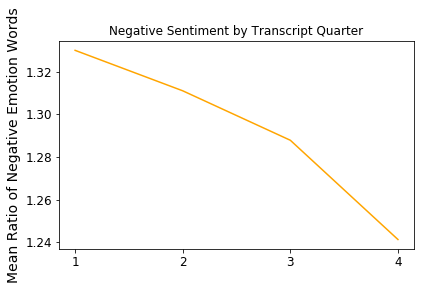

In [142]:
plt.plot(x,neg_means, c='orange')
plt.ylabel("Mean Ratio of Negative Emotion Words")
plt.title("Negative Sentiment by Transcript Quarter")
plt.xticks([1,2,3,4])
save_fig("negative_sentiment_by_transcript_quarter")
plt.show()

Saving figure sentiment_by_transcript_quarter


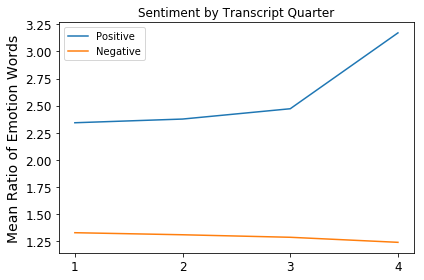

In [124]:
plt.plot(x,pos_means)
plt.plot(x,neg_means)
plt.ylabel("Mean Ratio of Emotion Words")
plt.title("Sentiment by Transcript Quarter")
plt.xticks([1,2,3,4])
plt.legend(["Positive", "Negative"])
save_fig("sentiment_by_transcript_quarter")
plt.show()

In [73]:
from scipy.stats import pearsonr

In [140]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

def plot_moral_words_by_year():
    ax1 = df.groupby('published_year')['MoralityGeneral'].mean().plot(c='brown',title="Ratio of General Morality Words by Year")
    ax1.set_ylabel("Mean Ratio of General Morality Words")
    #save_fig("Ratio of General Morality Words by Year")
    plt.show()
    
    ax2 = df.groupby('published_year')['Harm'].mean().plot(c='red',title="Ratio of Harm Words by Year")
    ax2.set_ylabel("Mean Ratio of Harm Words")
    #save_fig("Ratio of Harm Words by Year")
    plt.show()
    
    ax3 = df.groupby('published_year')['Authority'].mean().plot(c='orange',title="Ratio of Authority Words by Year")
    ax3.set_ylabel("Mean Ratio of Authority Words")
    #save_fig("Ratio of Authority Words by Year")
    plt.show()
    
    ax4 = df.groupby('published_year')['Fairness'].mean().plot(c='blue',title="Ratio of Fairness Words by Year")
    ax4.set_ylabel("Mean Ratio of Fairness Words")
    #save_fig("Ratio of Fairness Words by Year")
    
    plt.show()
    ax5 = df.groupby('published_year')['Ingroup'].mean().plot(c='green',title="Ratio of Ingroup Words by Year")
    ax5.set_ylabel("Mean Ratio of Ingroup Words")
    #save_fig("Ratio of Ingroup Words by Year")
    
    plt.show()
    ax6 = df.groupby('published_year')['Purity'].mean().plot(c='yellow',title="Ratio of Purity Words by Year")
    ax6.set_ylabel("Mean Ratio of Purity Words")
    #save_fig("Ratio of Purity Words by Year")
    plt.show()
    # Show correlation matrix of moral category by year
    
    # Show p-value of correlation of moral category by year
    

Saving figure Ratio of General Morality Words by Year


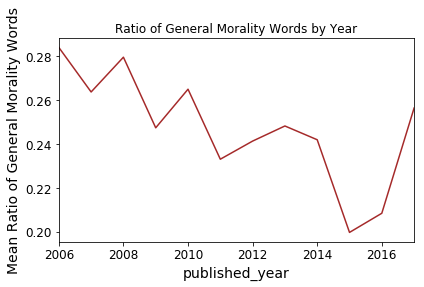

Saving figure Ratio of Harm Words by Year


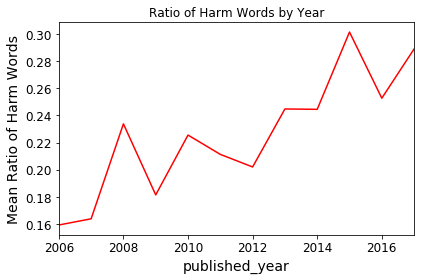

Saving figure Ratio of Authority Words by Year


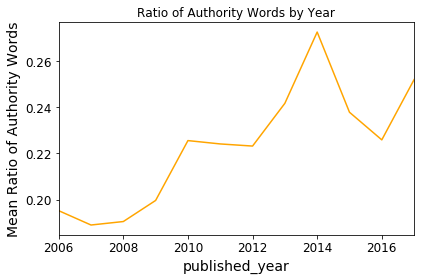

Saving figure Ratio of Fairness Words by Year


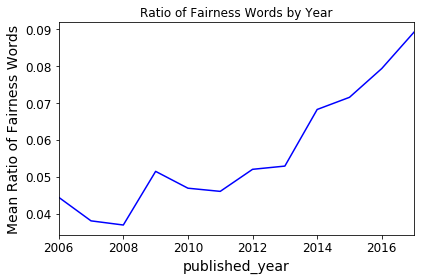

Saving figure Ratio of Ingroup Words by Year


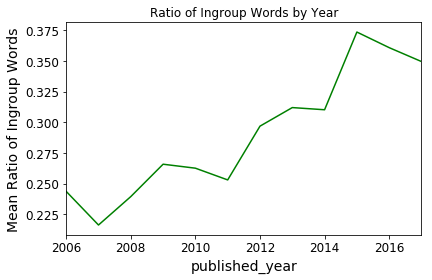

Saving figure Ratio of Purity Words by Year


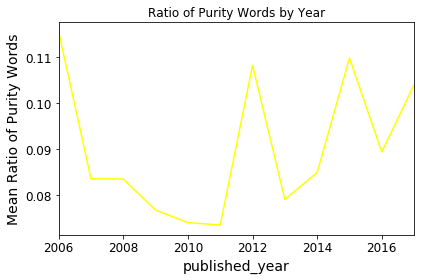

In [141]:
plot_moral_words_by_year()

In [35]:
df[['MoralityGeneral', 'Harm', 'Authority', 'Ingroup', 'Purity', 'Fairness', 'published_date']].corr()

,MoralityGeneral,Harm,Authority,Ingroup,Purity,Fairness,published_date
MoralityGeneral,1.000000,0.065378,0.068348,-0.037941,0.016400,0.123824,-0.052308
Harm,0.065378,1.000000,0.166907,0.216890,0.143721,0.096939,0.105854
Authority,0.068348,0.166907,1.000000,0.217058,-0.011165,0.148562,0.069671
Ingroup,-0.037941,0.216890,0.217058,1.000000,0.038544,0.126757,0.148848
Purity,0.016400,0.143721,-0.011165,0.038544,1.000000,-0.000744,0.034588
Fairness,0.123824,0.096939,0.148562,0.126757,-0.000744,1.000000,0.125746
published_date,-0.052308,0.105854,0.069671,0.148848,0.034588,0.125746,1.000000


In [37]:
moral_df = df[['MoralityGeneral', 'Harm', 'Authority', 'Ingroup', 'Purity', 'Fairness', 'published_date']]
calculate_pvalues(moral_df)

,MoralityGeneral,Harm,Authority,Ingroup,Purity,Fairness,published_date
MoralityGeneral,0,0.0012,0.0007,0.0607,0.4177,0,0.0097
Harm,0.0012,0,0,0,0,0,0
Authority,0.0007,0,0,0,0.5812,0,0.0006
Ingroup,0.0607,0,0,0,0.0568,0,0
Purity,0.4177,0,0.5812,0.0568,0,0.9707,0.0874
Fairness,0,0,0,0,0.9707,0,0
published_date,0.0097,0,0.0006,0,0.0874,0,0


In [ ]:
def normalize(x, label):
    return x.count(term)

In [62]:
df['norm_persuasive'] = df['persuasive'] / df['views']

In [63]:
df['norm_persuasive'].describe()

count    2406.000000
mean        0.000137
std         0.000167
min         0.000000
25%         0.000038
50%         0.000091
75%         0.000180
max         0.002759
Name: norm_persuasive, dtype: float64

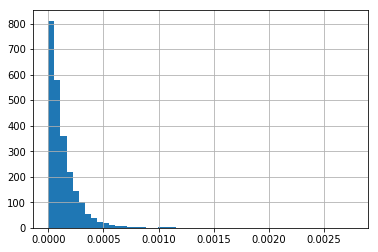

In [67]:
df['norm_persuasive'].hist(bins=50)

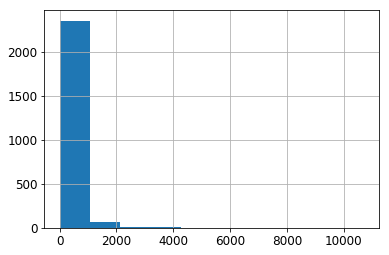

In [217]:
ax = df['persuasive'].hist()



Saving figure Views by Question Words in TED Talks


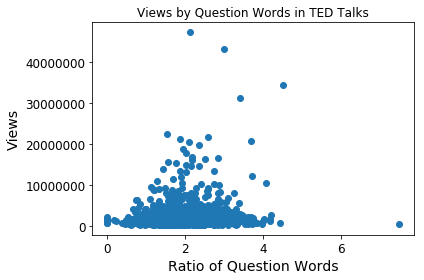

In [159]:
plt.scatter(df['interrog'], df['views'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Views')
plt.xlabel('Ratio of Question Words')
plt.title('Views by Question Words in TED Talks')
save_fig('Views by Question Words in TED Talks')
plt.show()

In [153]:
df['interrog'].idxmax()

76

In [165]:
df.iloc[76]['transcript']

'Hello. Actually, that\'s "hello" in Bauer Bodoni for the typographically hysterical amongst us. One of the threads that seems to have come through loud and clear in the last couple of days is this need to reconcile what the Big wants \x8a\x97\x94 the "Big" being the organization, the system, the country \x8a\x97\x94 and what the "Small" wants \x8a\x97\x94 the individual, the person. And how do you bring those two things together? Charlie Ledbetter, yesterday, I thought, talked very articulately about this need to bring consumers, to bring people into the process of creating things. And that\'s what I want to talk about today. So, bringing together the Small to help facilitate and create the Big, I think, is something that we believe in \x8a\x97\x94 something I believe in, and something that we kind of bring to life through what we do at Ideo.I call this first chapter \x8a\x97\x94 for the Brits in the room \x8a\x97\x94 the "Blinding Glimpse of the Bleeding Obvious." Often, the good ide

In [158]:
df['views'].max()

47227110

In [162]:
def normalize_for_views():
    df['norm_persuasive'] = df['persuasive'] / df['views']
    df['norm_inspiring'] = df['inspiring'] / df['views']
    df['norm_unconvincing'] = df['unconvincing'] / df['views']
    return df

In [163]:
normalize_for_views()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,published_date,...,published_dt,published_year,Harm,Fairness,Purity,Ingroup,Authority,norm_persuasive,norm_inspiring,norm_unconvincing
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1151367060,...,2006-06-27 00:11:00,2006,0.00,0.00,0.03,0.03,0.41,0.000227,0.000528,0.000006
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1151367060,...,2006-06-27 00:11:00,2006,0.00,0.00,0.00,0.55,0.41,0.000084,0.000129,0.000081
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1151367060,...,2006-06-27 00:11:00,2006,0.03,0.00,0.09,0.12,0.03,0.000141,0.000141,0.000064
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1151367060,...,2006-06-27 00:11:00,2006,0.29,0.22,0.06,0.96,0.13,0.000271,0.000630,0.000021
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1151440680,...,2006-06-27 20:38:00,2006,0.00,0.16,0.03,1.04,0.00,0.000212,0.000241,0.000006
5,5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1151440680,...,2006-06-27 20:38:00,2006,0.28,0.02,0.00,0.25,0.21,0.000117,0.000252,0.000018
6,6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1152490260,...,2006-07-10 00:11:00,2006,0.21,0.03,0.37,0.17,0.27,0.000082,0.000116,0.000060
7,7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1152490260,...,2006-07-10 00:11:00,2006,0.03,0.03,0.06,0.06,0.36,0.000038,0.000181,0.000027
8,8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1153181460,...,2006-07-18 00:11:00,2006,0.06,0.06,0.11,0.08,0.28,0.000298,0.000172,0.000110
9,9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,TED2006,1140825600,31,Rick Warren,Rick Warren: A life of purpose,1153181460,...,2006-07-18 00:11:00,2006,0.20,0.00,0.29,0.09,0.14,0.000498,0.000826,0.000271


Saving figure Persuasive Rating by Question Words in TED Talks


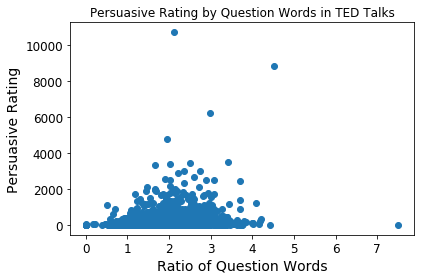

In [187]:
ax = plt.scatter(df['interrog'], df['persuasive'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Persuasive Rating')
#plt.ylim(0,0.003)
plt.xlabel('Ratio of Question Words')
plt.title('Persuasive Rating by Question Words in TED Talks')
save_fig('Persuasive Rating by Question Words in TED Talks')
plt.show()

Saving figure Persuasive Rating by Negative Emotion Words in TED Talks


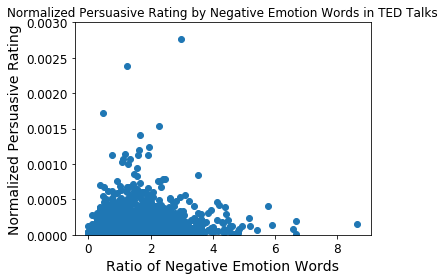

In [192]:
ax = plt.scatter(df['negemo'], df['norm_persuasive'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Normalized Persuasive Rating')
plt.ylim(0,0.003)
plt.xlabel('Ratio of Negative Emotion Words')
plt.title('Normalized Persuasive Rating by Negative Emotion Words in TED Talks')
save_fig('Persuasive Rating by Negative Emotion Words in TED Talks')
plt.show()

In [197]:
df[['main_speaker','title','views']][df['views'] > 20000000].sort_values('views', ascending=False)

,main_speaker,title,views
0,Ken Robinson,Do schools kill creativity?,47227110
1346,Amy Cuddy,Your body language may shape who you are,43155405
677,Simon Sinek,How great leaders inspire action,34309432
837,BrenÌ© Brown,The power of vulnerability,31168150
452,Mary Roach,10 things you didn't know about orgasm,22270883
1776,Julian Treasure,How to speak so that people want to listen,21594632
201,Jill Bolte Taylor,My stroke of insight,21190883
5,Tony Robbins,Why we do what we do,20685401
2114,James Veitch,This is what happens when you reply to spam email,20475972


Saving figure Views by We Ratio in TED Talks


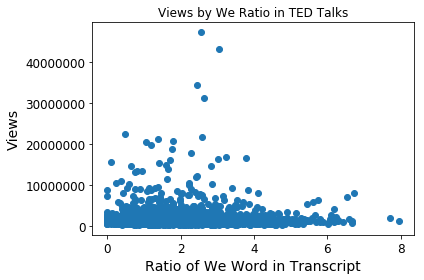

In [247]:
plt.scatter(df['we'], df['views'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Views')
plt.xlabel('Ratio of We Word in Transcript')
plt.title('Views by We Ratio in TED Talks')
save_fig('Views by We Ratio in TED Talks')
plt.show()

Saving figure Normalized Persuasive Rating by Change in Sentiment Words in TED Talks


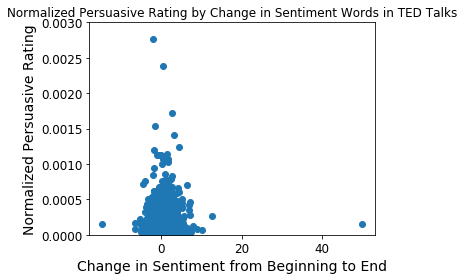

In [232]:
ax = plt.scatter(df['affect_change_q'], df['norm_persuasive'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Normalized Persuasive Rating')
plt.ylim(0,0.003)
plt.xlabel('Change in Sentiment from Beginning to End')
plt.title('Normalized Persuasive Rating by Change in Sentiment Words in TED Talks')
save_fig('Normalized Persuasive Rating by Change in Sentiment Words in TED Talks')
plt.show()

Saving figure Normalized Inspiring Rating by Change in Negative Words in TED Talks


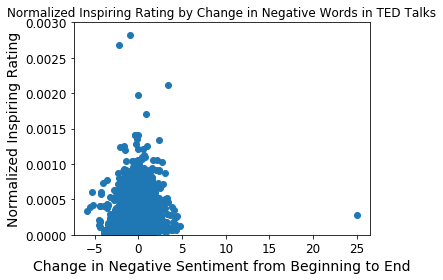

In [233]:
ax = plt.scatter(df['negemo_change_q'], df['norm_inspiring'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Normalized Inspiring Rating')
plt.ylim(0,0.003)
plt.xlabel('Change in Negative Sentiment from Beginning to End')
plt.title('Normalized Inspiring Rating by Change in Negative Words in TED Talks')
save_fig('Normalized Inspiring Rating by Change in Negative Words in TED Talks')
plt.show()

In [227]:
df['affect_change_q'].idxmax()

298

In [228]:
df.iloc[298]['transcript']

"I think all of us have been interested, at one time or another, in the romantic mysteries of all those societies that collapsed, such as the classic Maya in the Yucatan, the Easter Islanders, the Anasazi, Fertile Crescent society, Angor Wat, Great Zimbabwe and so on. And within the last decade or two, archaeologists have shown us that there were environmental problems underlying many of these past collapses. But there were also plenty of places in the world where societies have been developing for thousands of years without any sign of a major collapse, such as Japan, Java, Tonga and Tikopea. So evidently, societies in some areas are more fragile than in other areas. How can we understand what makes some societies more fragile than other societies? The problem is obviously relevant to our situation today, because today as well, there are some societies that have already collapsed, such as Somalia and Rwanda and the former Yugoslavia. There are also societies today that may be close to

Saving figure Normalized Inspiring Rating by Ratio of Personal Pronoun Words in TED Talks


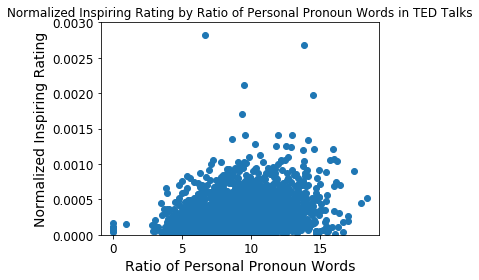

In [234]:
ax = plt.scatter(df['ppron'], df['norm_inspiring'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Normalized Inspiring Rating')
plt.ylim(0,0.003)
plt.xlabel('Ratio of Personal Pronoun Words')
plt.title('Normalized Inspiring Rating by Ratio of Personal Pronoun Words in TED Talks')
save_fig('Normalized Inspiring Rating by Ratio of Personal Pronoun Words in TED Talks')
plt.show()

Saving figure Normalized Inspiring Rating by Ratio of You in TED Talks


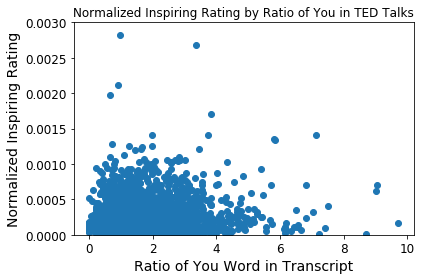

In [235]:
ax = plt.scatter(df['you'], df['norm_inspiring'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Normalized Inspiring Rating')
plt.ylim(0,0.003)
plt.xlabel('Ratio of You Word in Transcript')
plt.title('Normalized Inspiring Rating by Ratio of You in TED Talks')
save_fig('Normalized Inspiring Rating by Ratio of You in TED Talks')
plt.show()

Saving figure Normalized Persuasive Rating by Ratio of She and He in TED Talks


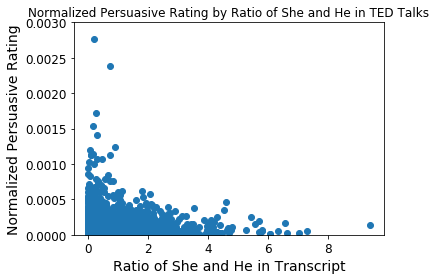

In [237]:
ax = plt.scatter(df['shehe'], df['norm_persuasive'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Normalized Persuasive Rating')
plt.ylim(0,0.003)
plt.xlabel('Ratio of She and He in Transcript')
plt.title('Normalized Persuasive Rating by Ratio of She and He in TED Talks')
save_fig('Normalized Persuasive Rating by Ratio of She and He in TED Talks')
plt.show()

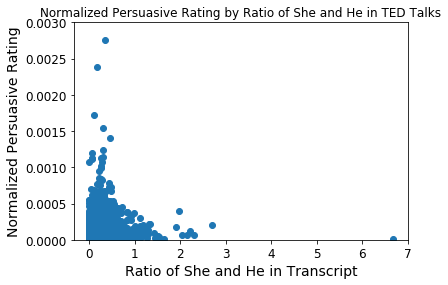

In [245]:
ax = plt.scatter(df['sad'], df['norm_persuasive'])
plt.ticklabel_format(style = 'plain')
plt.ylabel('Normalized Persuasive Rating')
plt.ylim(0,0.003)
plt.xlabel('Ratio of She and He in Transcript')
plt.title('Normalized Persuasive Rating by Ratio of She and He in TED Talks')
#save_fig('Normalized Persuasive Rating by Ratio of She and He in TED Talks')
plt.show()

In [248]:
df.to_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented2.xls"), encoding="ISO-8859-1")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17b813c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f496828>]], dtype=object)

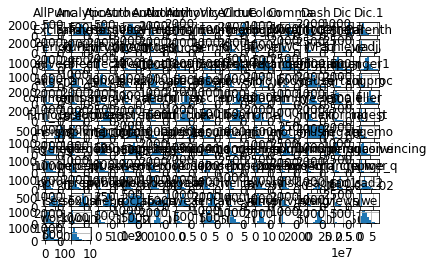

In [254]:
df.hist()

In [250]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [255]:
my_columns = list(newdf.columns)

Saving figure index Variable in TED Talks


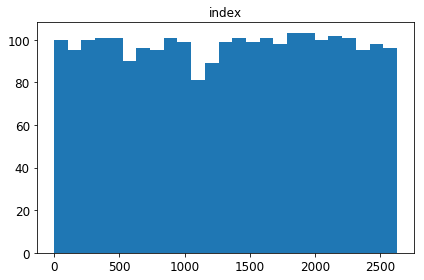

Saving figure comments Variable in TED Talks


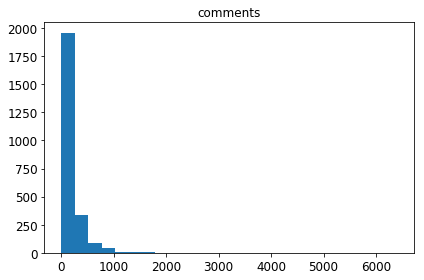

Saving figure duration Variable in TED Talks


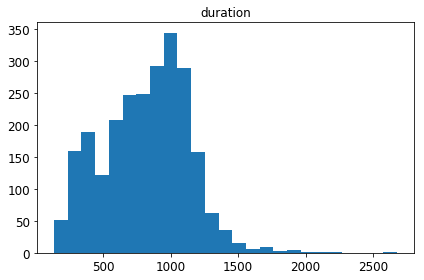

Saving figure film_date Variable in TED Talks


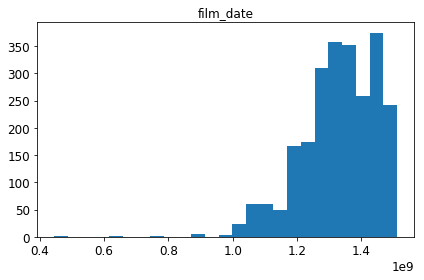

Saving figure languages Variable in TED Talks


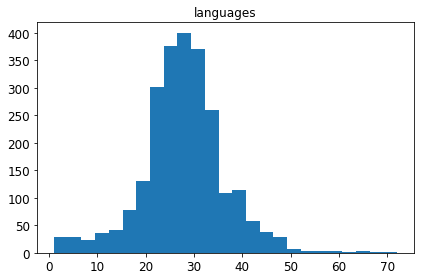

Saving figure published_date Variable in TED Talks


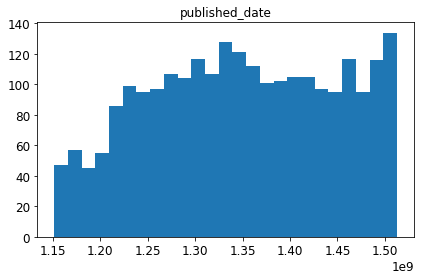

Saving figure views Variable in TED Talks


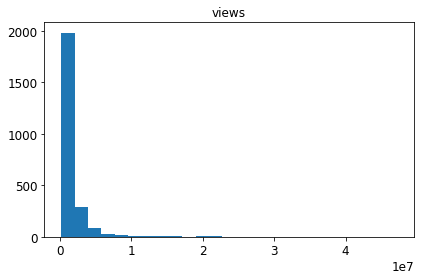

Saving figure music Variable in TED Talks


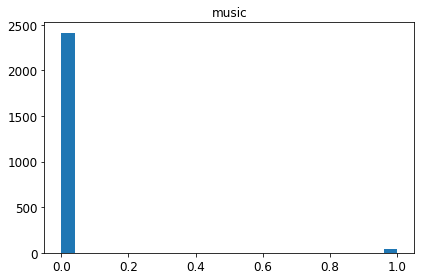

Saving figure conversation Variable in TED Talks


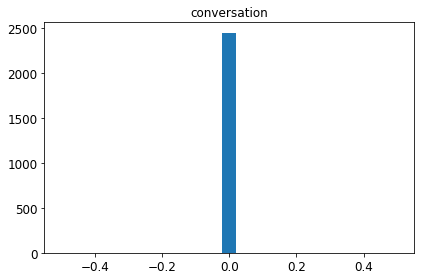

Saving figure persuasive Variable in TED Talks


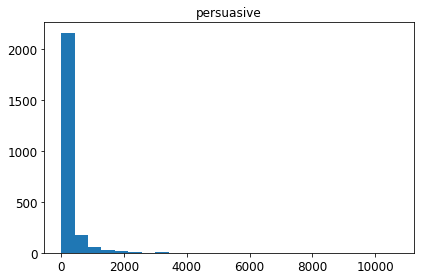

Saving figure inspiring Variable in TED Talks


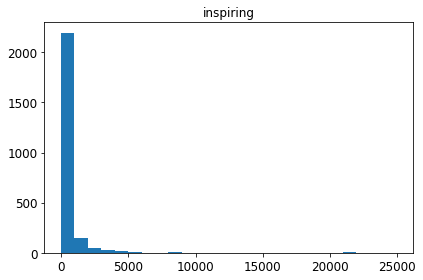

Saving figure unconvincing Variable in TED Talks


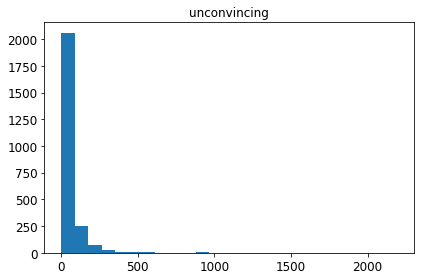

Saving figure applause Variable in TED Talks


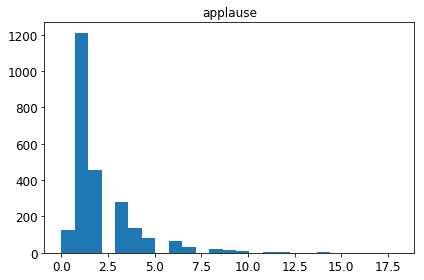

Saving figure laughter Variable in TED Talks


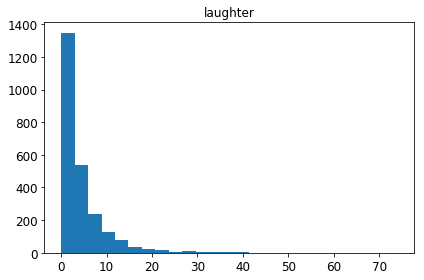

Saving figure WC Variable in TED Talks


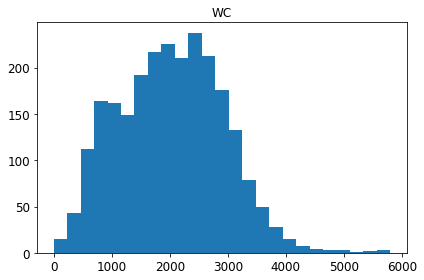

Saving figure Analytic Variable in TED Talks


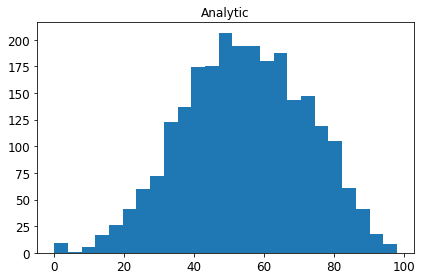

Saving figure Clout Variable in TED Talks


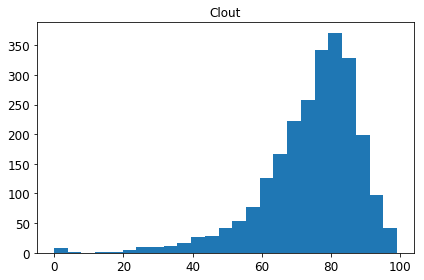

Saving figure Authentic Variable in TED Talks


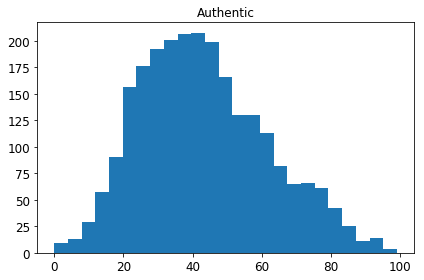

Saving figure Tone Variable in TED Talks


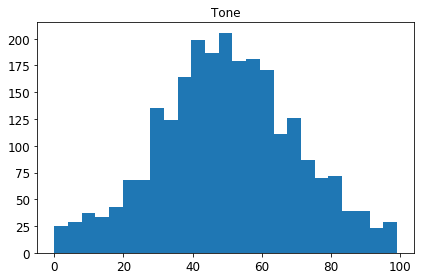

Saving figure WPS Variable in TED Talks


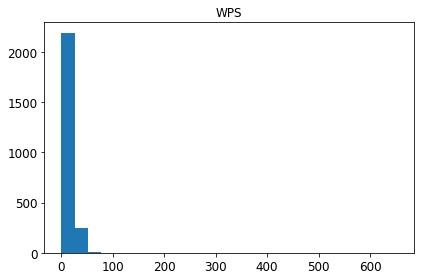

Saving figure Sixltr Variable in TED Talks


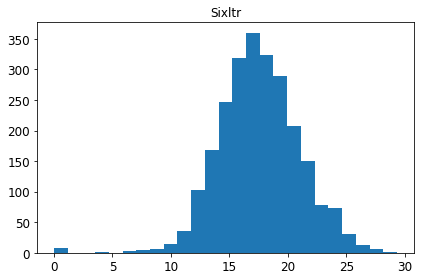

Saving figure Dic Variable in TED Talks


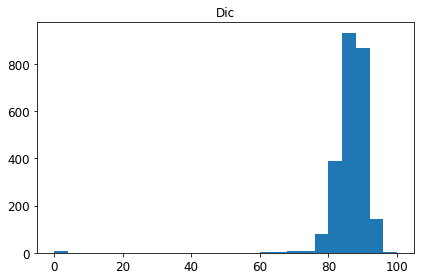

Saving figure function Variable in TED Talks


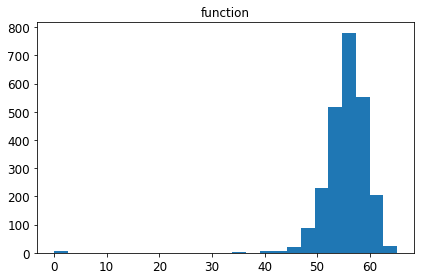

Saving figure pronoun Variable in TED Talks


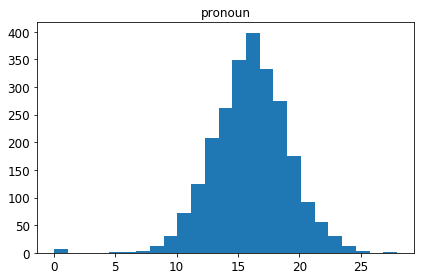

Saving figure ppron Variable in TED Talks


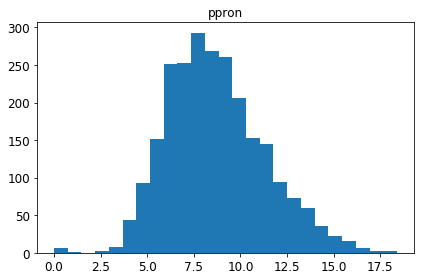

Saving figure i Variable in TED Talks


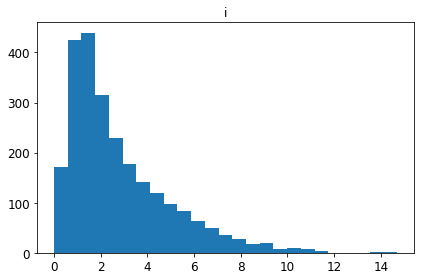

Saving figure we Variable in TED Talks


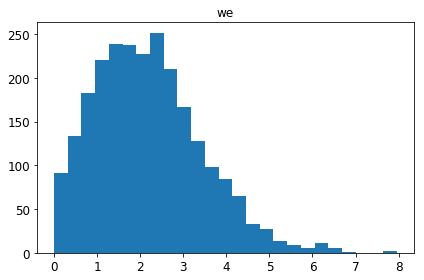

Saving figure you Variable in TED Talks


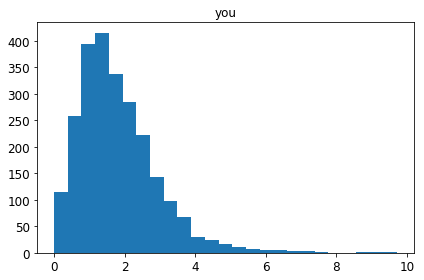

Saving figure shehe Variable in TED Talks


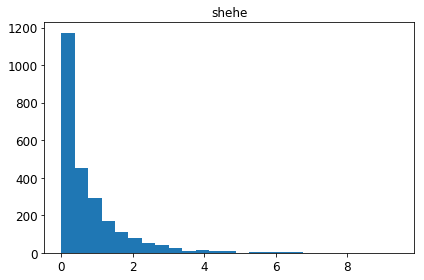

Saving figure they Variable in TED Talks


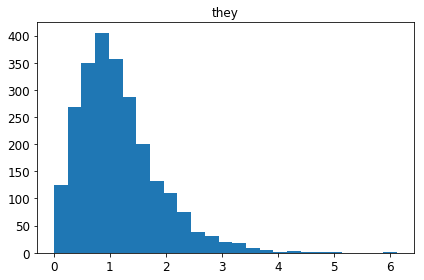

Saving figure ipron Variable in TED Talks


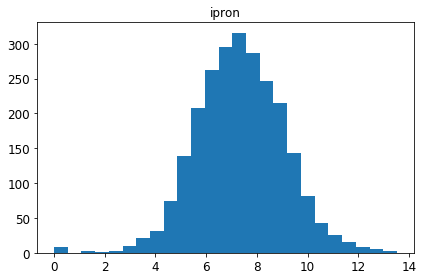

Saving figure article Variable in TED Talks


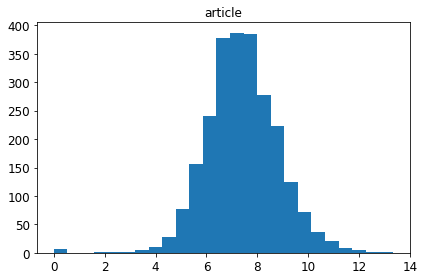

Saving figure prep Variable in TED Talks


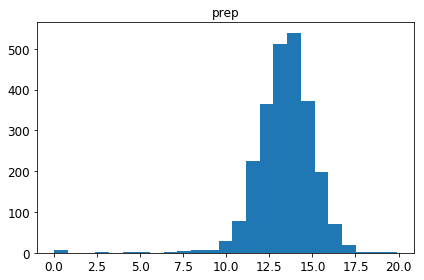

Saving figure auxverb Variable in TED Talks


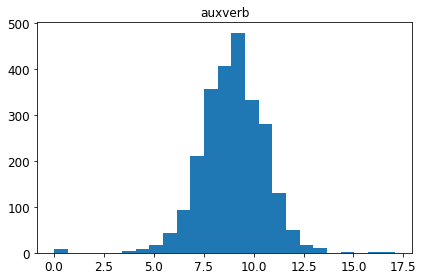

Saving figure adverb Variable in TED Talks


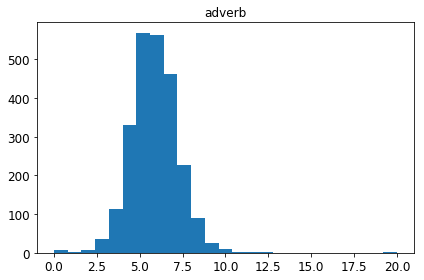

Saving figure conj Variable in TED Talks


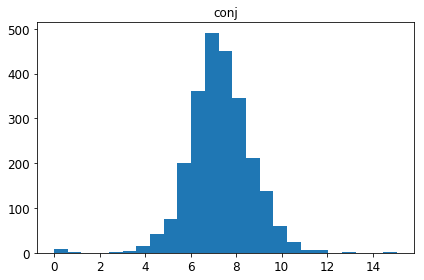

Saving figure negate Variable in TED Talks


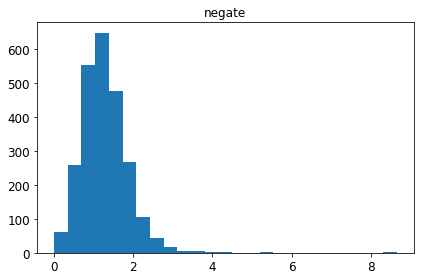

Saving figure verb Variable in TED Talks


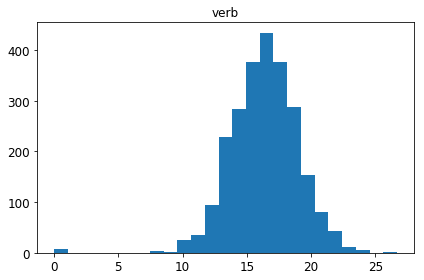

Saving figure adj Variable in TED Talks


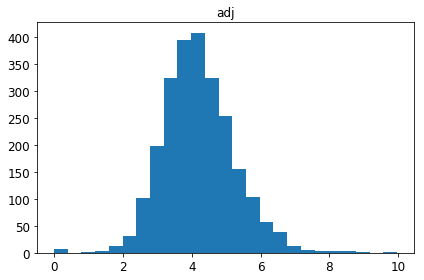

Saving figure compare Variable in TED Talks


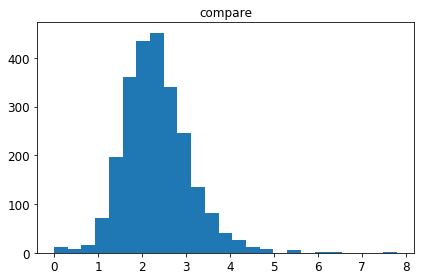

Saving figure interrog Variable in TED Talks


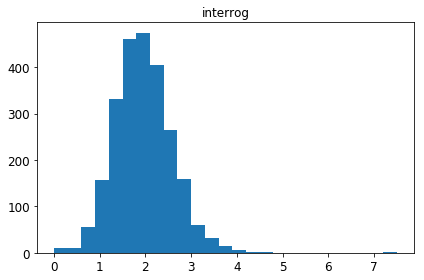

Saving figure number Variable in TED Talks


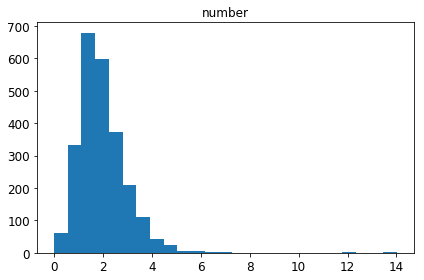

Saving figure quant Variable in TED Talks


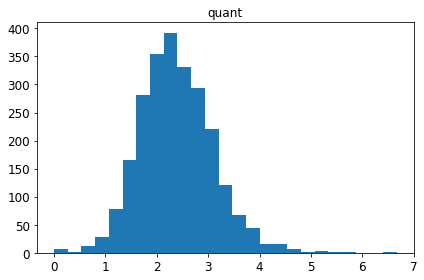

Saving figure affect Variable in TED Talks


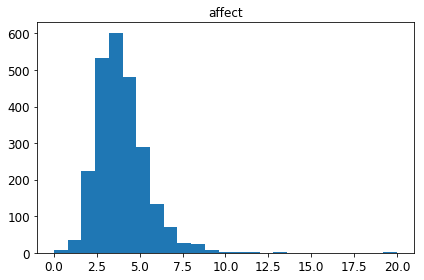

Saving figure posemo Variable in TED Talks


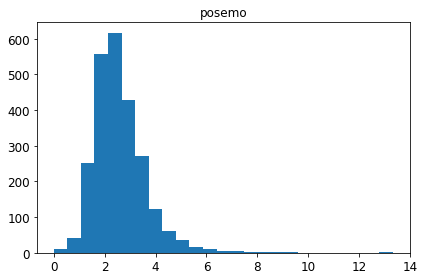

Saving figure negemo Variable in TED Talks


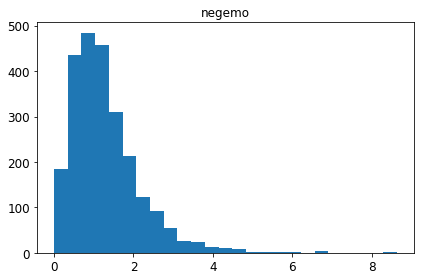

Saving figure anx Variable in TED Talks


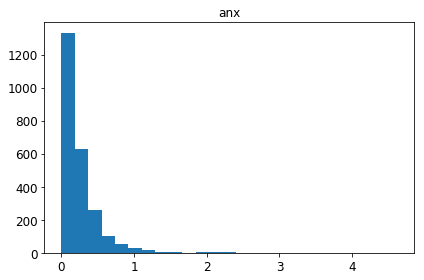

Saving figure anger Variable in TED Talks


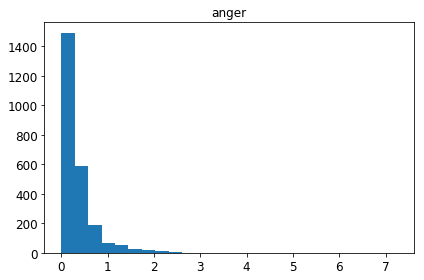

Saving figure sad Variable in TED Talks


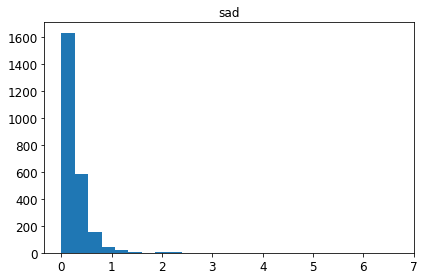

Saving figure social Variable in TED Talks


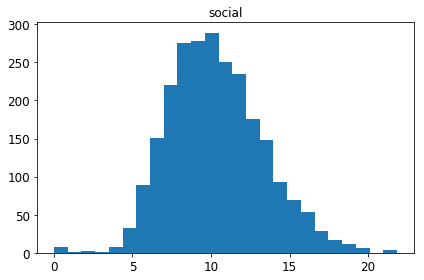

Saving figure family Variable in TED Talks


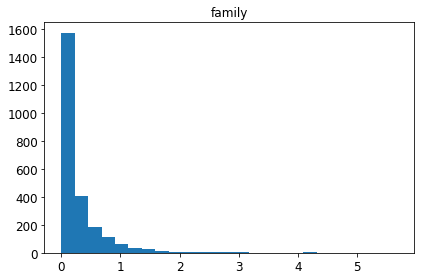

Saving figure friend Variable in TED Talks


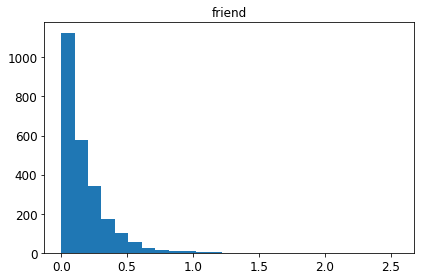

Saving figure female Variable in TED Talks


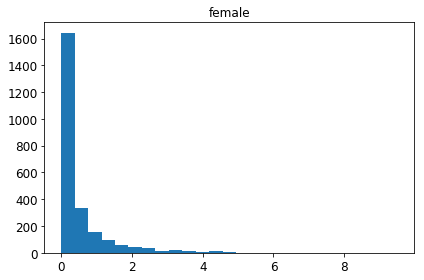

Saving figure male Variable in TED Talks


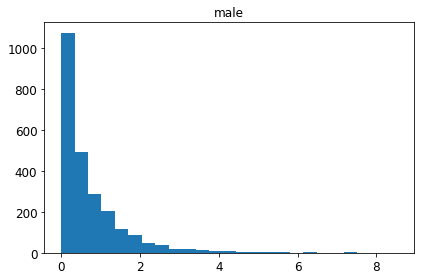

Saving figure cogproc Variable in TED Talks


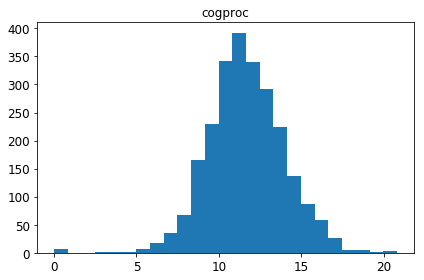

Saving figure insight Variable in TED Talks


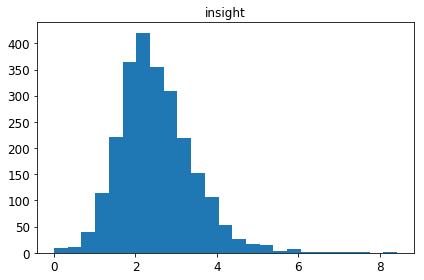

Saving figure cause Variable in TED Talks


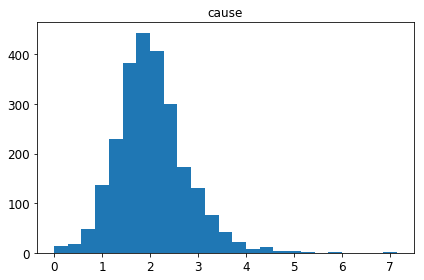

Saving figure discrep Variable in TED Talks


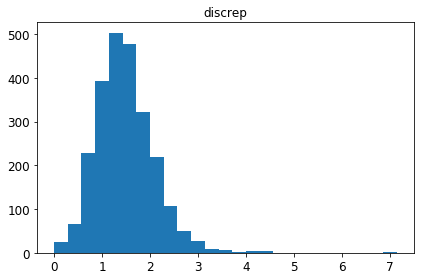

Saving figure tentat Variable in TED Talks


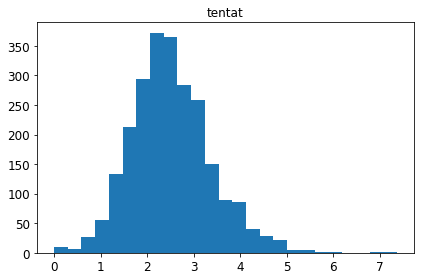

Saving figure certain Variable in TED Talks


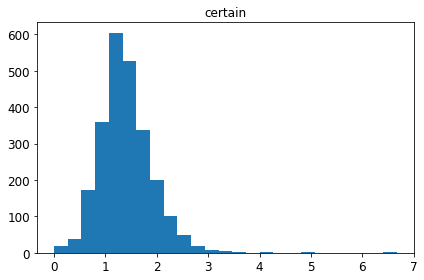

Saving figure differ Variable in TED Talks


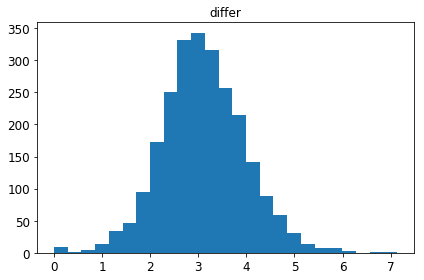

Saving figure percept Variable in TED Talks


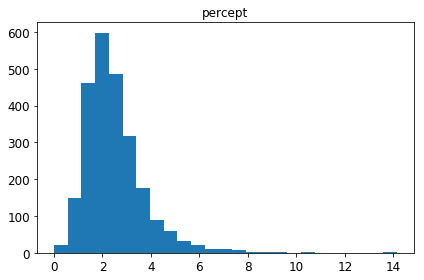

Saving figure see Variable in TED Talks


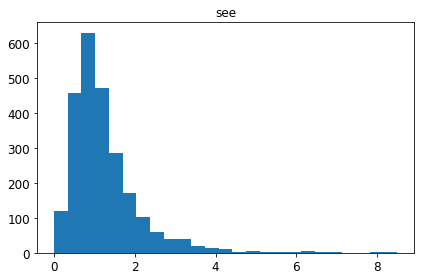

Saving figure hear Variable in TED Talks


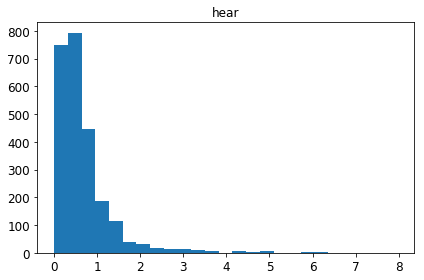

Saving figure feel Variable in TED Talks


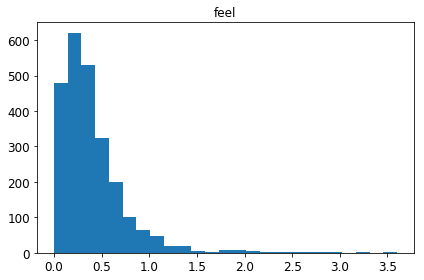

Saving figure bio Variable in TED Talks


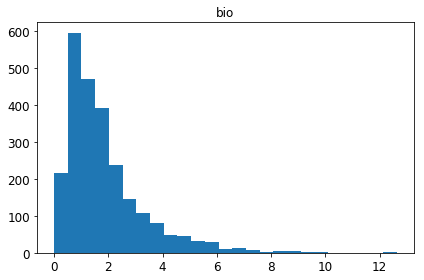

Saving figure body Variable in TED Talks


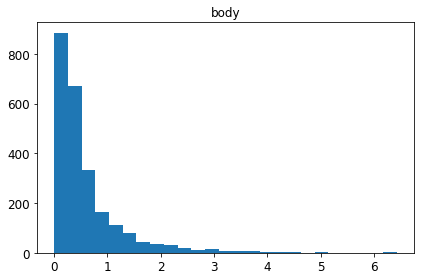

Saving figure health Variable in TED Talks


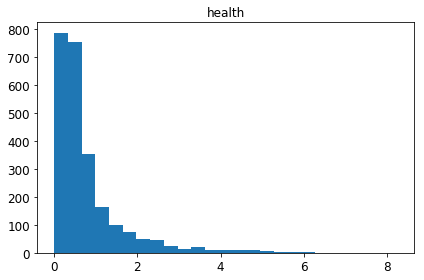

Saving figure sexual Variable in TED Talks


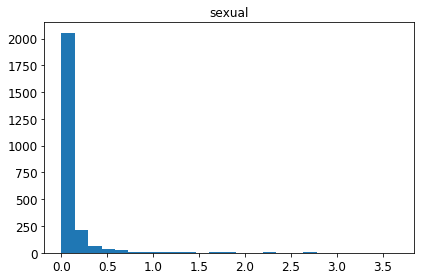

Saving figure ingest Variable in TED Talks


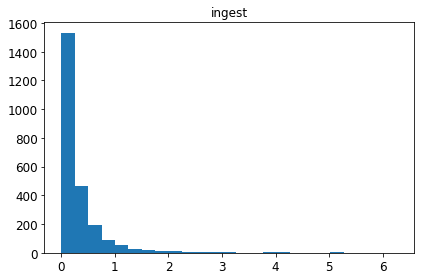

Saving figure drives Variable in TED Talks


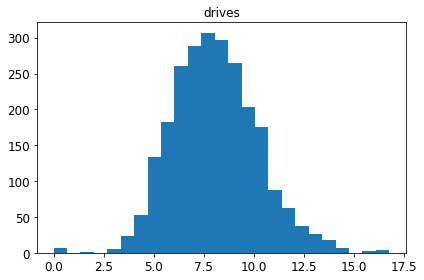

Saving figure affiliation Variable in TED Talks


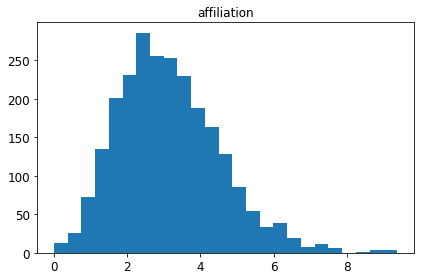

Saving figure achieve Variable in TED Talks


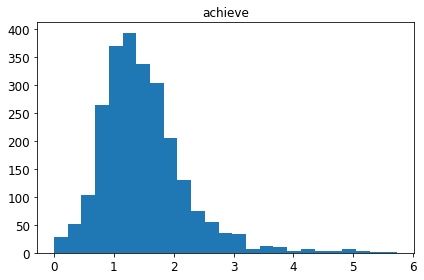

Saving figure power Variable in TED Talks


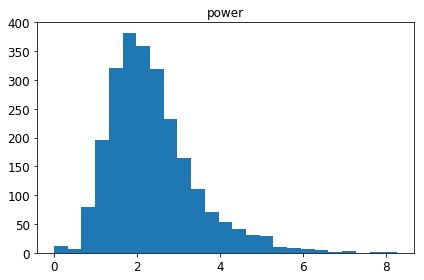

Saving figure reward Variable in TED Talks


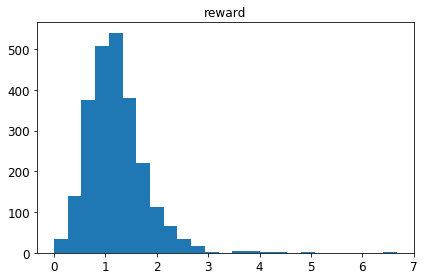

Saving figure risk Variable in TED Talks


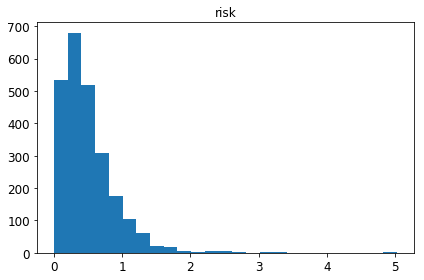

Saving figure focuspast Variable in TED Talks


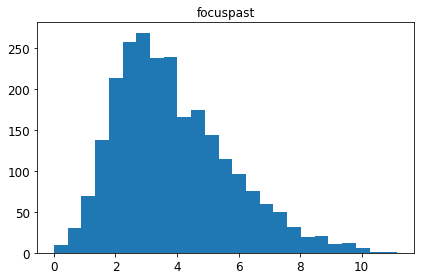

Saving figure focuspresent Variable in TED Talks


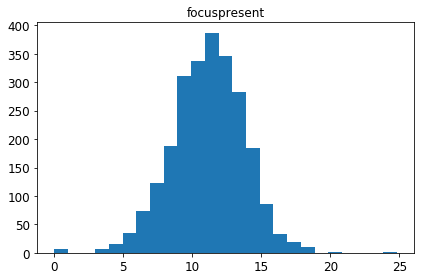

Saving figure focusfuture Variable in TED Talks


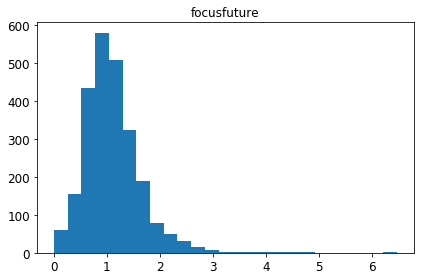

Saving figure relativ Variable in TED Talks


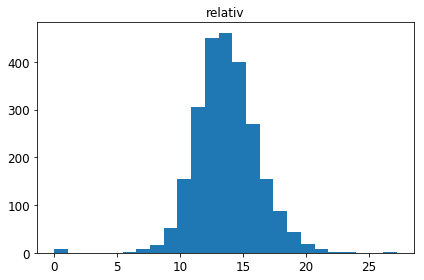

Saving figure motion Variable in TED Talks


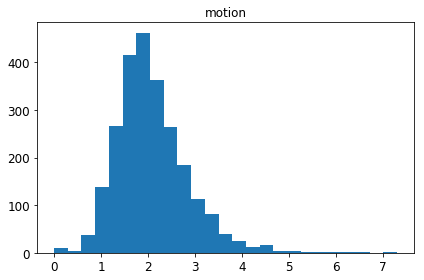

Saving figure space Variable in TED Talks


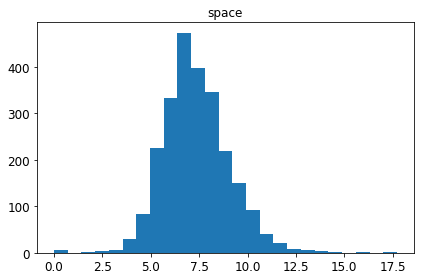

Saving figure time Variable in TED Talks


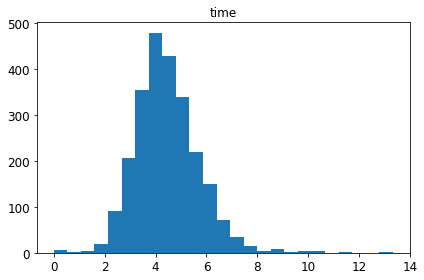

Saving figure work Variable in TED Talks


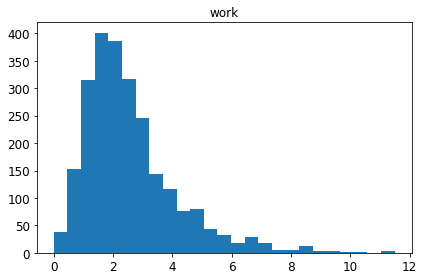

Saving figure leisure Variable in TED Talks


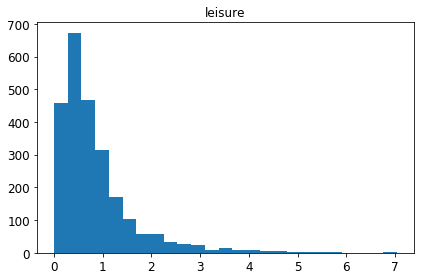

Saving figure home Variable in TED Talks


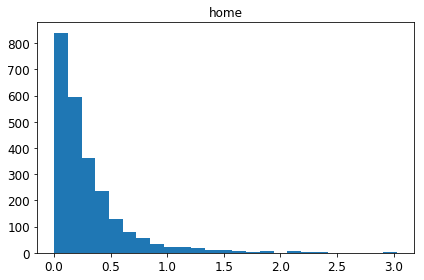

Saving figure money Variable in TED Talks


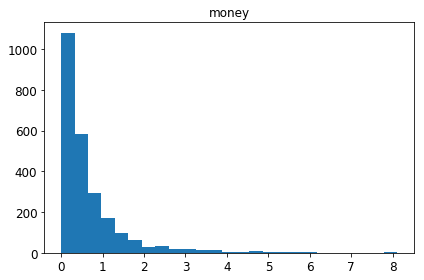

Saving figure relig Variable in TED Talks


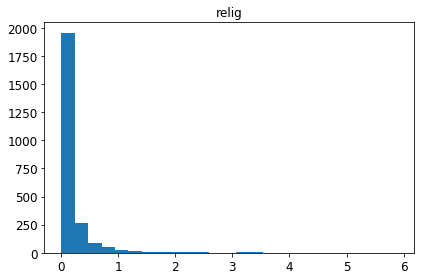

Saving figure death Variable in TED Talks


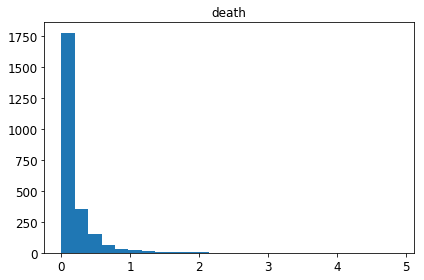

Saving figure informal Variable in TED Talks


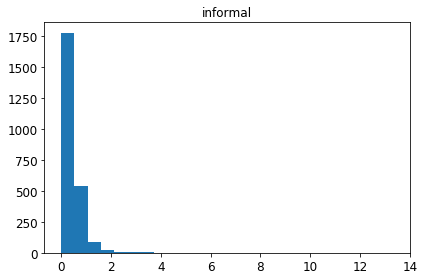

Saving figure swear Variable in TED Talks


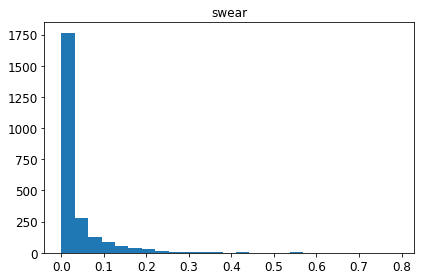

Saving figure netspeak Variable in TED Talks


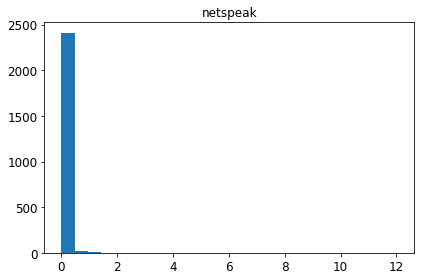

Saving figure assent Variable in TED Talks


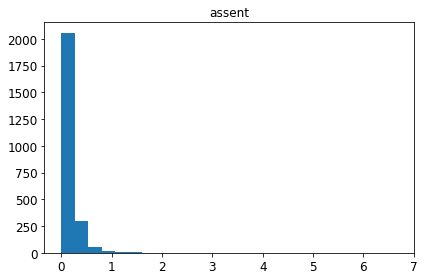

Saving figure nonflu Variable in TED Talks


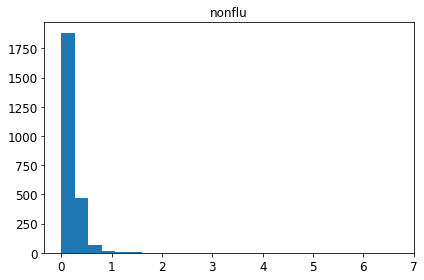

Saving figure filler Variable in TED Talks


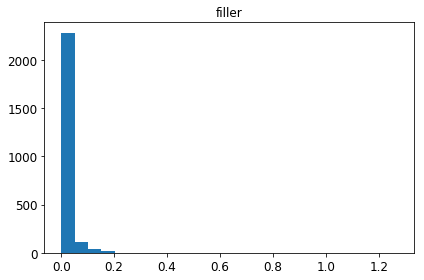

Saving figure AllPunc Variable in TED Talks


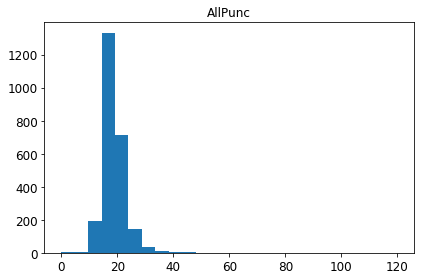

Saving figure Period Variable in TED Talks


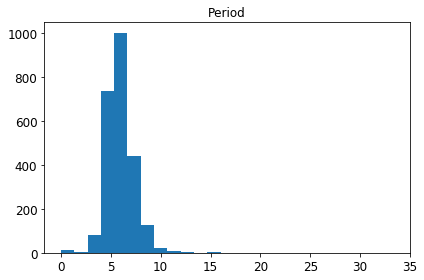

Saving figure Comma Variable in TED Talks


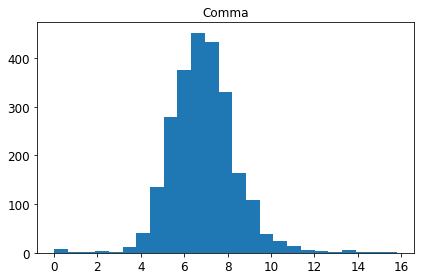

Saving figure Colon Variable in TED Talks


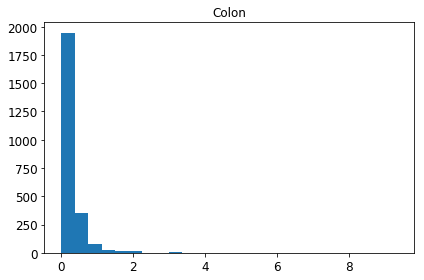

Saving figure SemiC Variable in TED Talks


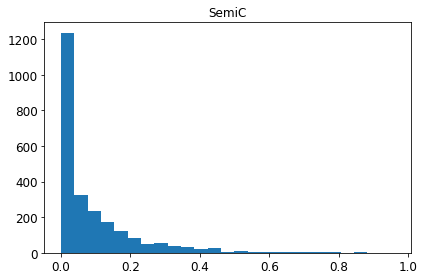

Saving figure QMark Variable in TED Talks


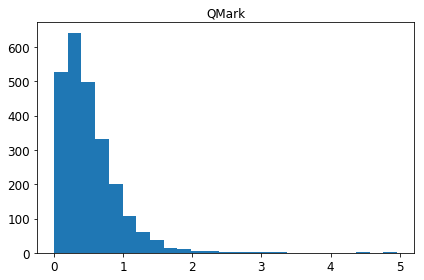

Saving figure Exclam Variable in TED Talks


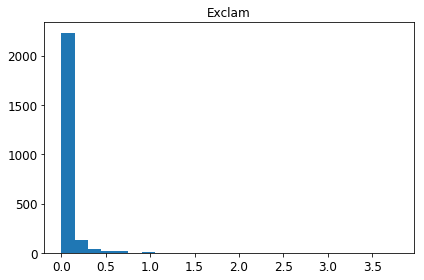

Saving figure Dash Variable in TED Talks


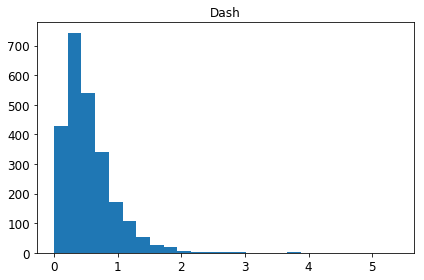

Saving figure Quote Variable in TED Talks


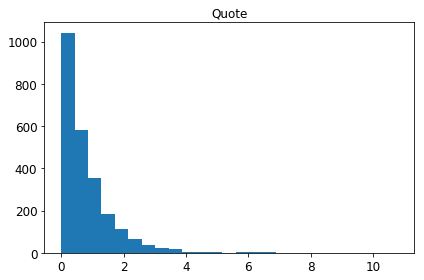

Saving figure Apostro Variable in TED Talks


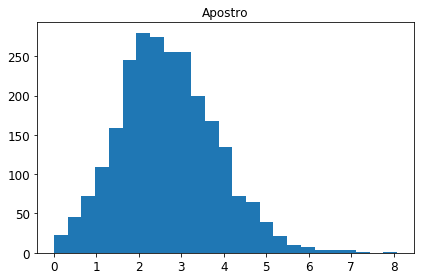

Saving figure Parenth Variable in TED Talks


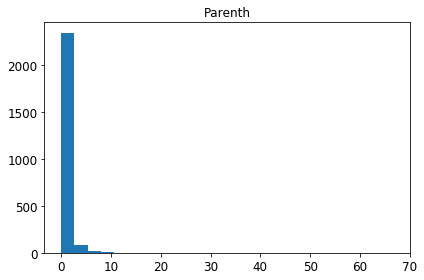

Saving figure OtherP Variable in TED Talks


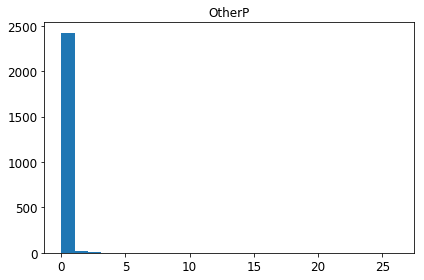

Saving figure Dic.1 Variable in TED Talks


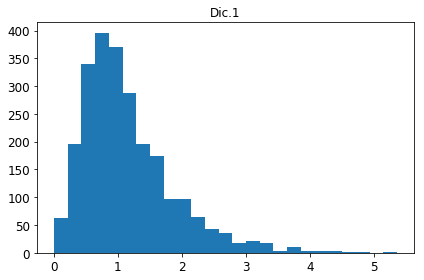

Saving figure HarmVirtue Variable in TED Talks


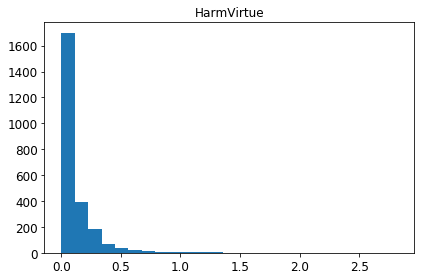

Saving figure HarmVice Variable in TED Talks


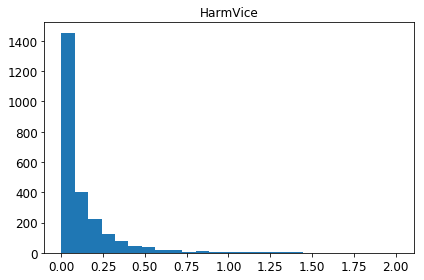

Saving figure FairnessVirtue Variable in TED Talks


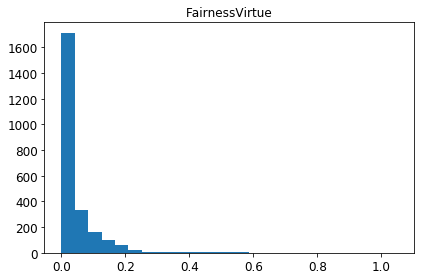

Saving figure FairnessVice Variable in TED Talks


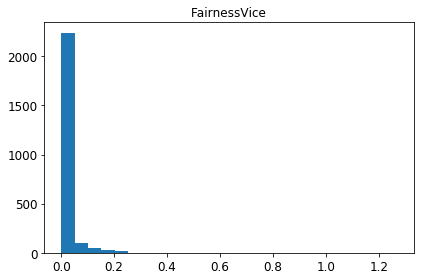

Saving figure IngroupVirtue Variable in TED Talks


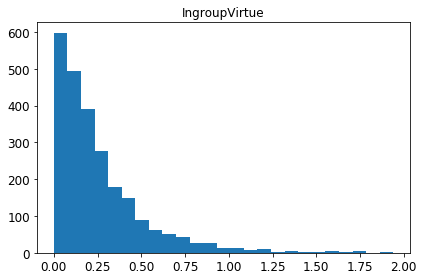

Saving figure IngroupVice Variable in TED Talks


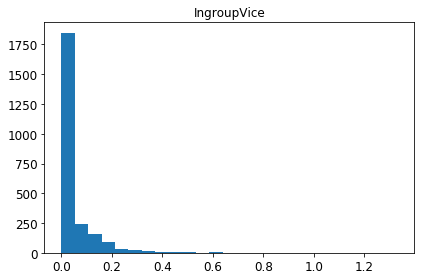

Saving figure AuthorityVirtue Variable in TED Talks


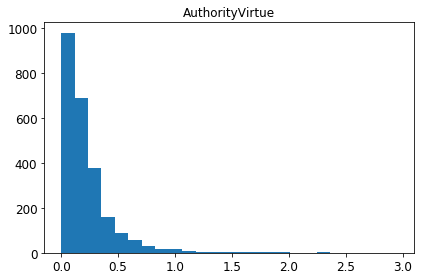

Saving figure AuthorityVice Variable in TED Talks


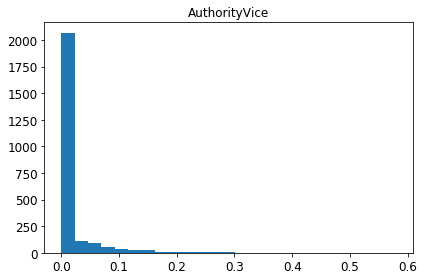

Saving figure PurityVirtue Variable in TED Talks


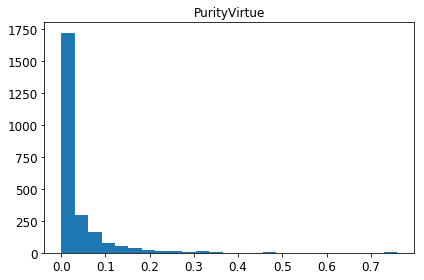

Saving figure PurityVice Variable in TED Talks


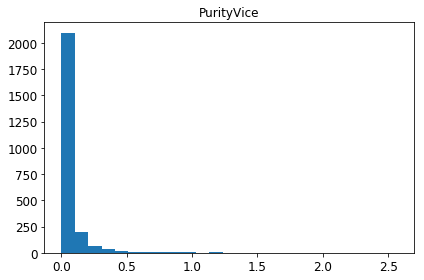

Saving figure MoralityGeneral Variable in TED Talks


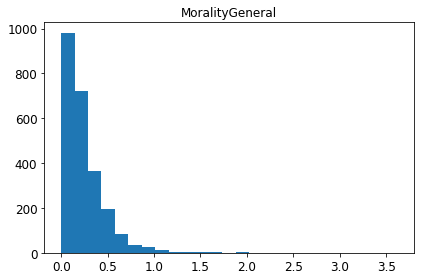

Saving figure affect1 Variable in TED Talks


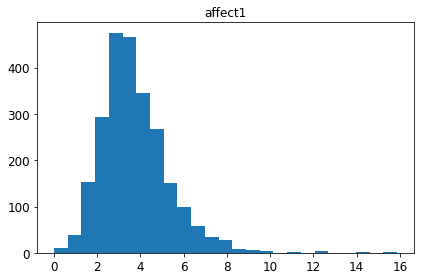

Saving figure posemo1 Variable in TED Talks


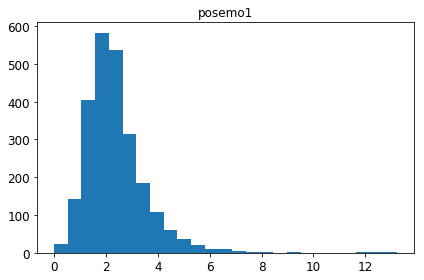

Saving figure negemo1 Variable in TED Talks


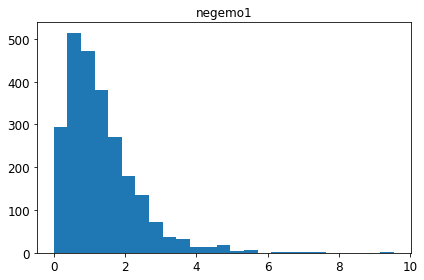

Saving figure anx1 Variable in TED Talks


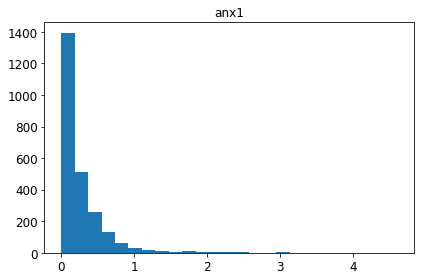

Saving figure anger1 Variable in TED Talks


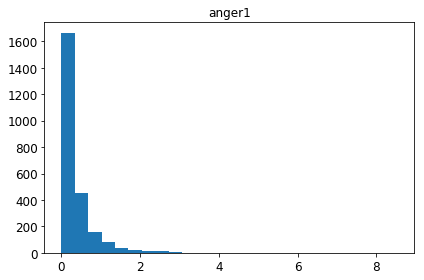

Saving figure sad1 Variable in TED Talks


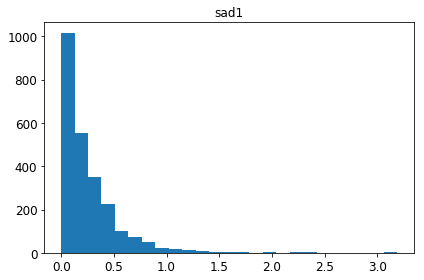

Saving figure affect2 Variable in TED Talks


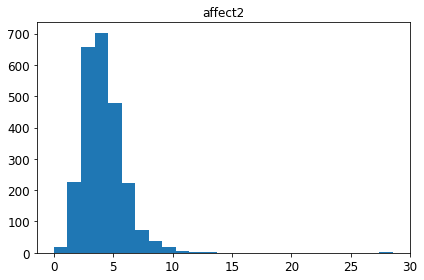

Saving figure posemo2 Variable in TED Talks


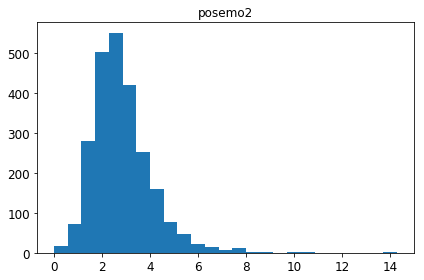

Saving figure negemo2 Variable in TED Talks


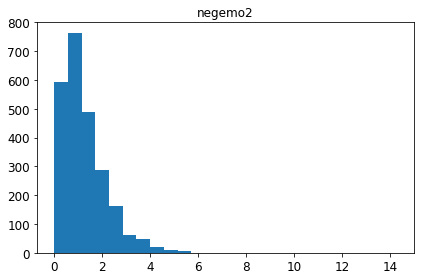

Saving figure anx2 Variable in TED Talks


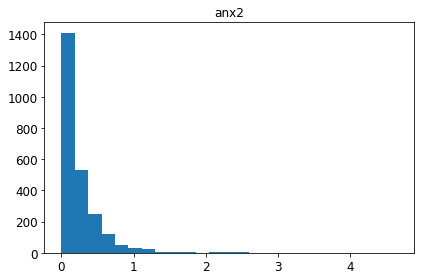

Saving figure anger2 Variable in TED Talks


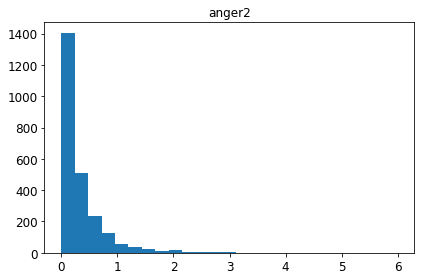

Saving figure sad2 Variable in TED Talks


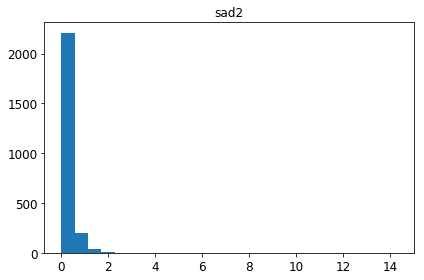

ValueError: max must be larger than min in range parameter.

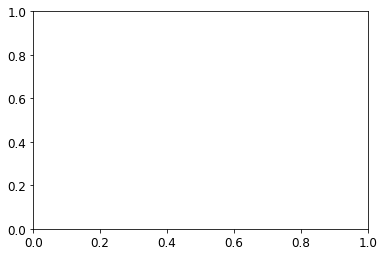

In [263]:
for col in my_columns:
    plt.hist(df[col], bins=25)
    plt.title(col)
    save_fig(col + " Variable in TED Talks")
    plt.show()

In [266]:
df['views'].describe()

count    2.444000e+03
mean     1.725175e+06
std      2.526154e+06
min      1.558950e+05
25%      7.878218e+05
50%      1.136904e+06
75%      1.702149e+06
max      4.722711e+07
Name: views, dtype: float64

In [267]:
df['persuasive'].describe()

count     2444.000000
mean       223.726678
std        472.005250
min          0.000000
25%         39.000000
50%         98.000000
75%        229.000000
max      10704.000000
Name: persuasive, dtype: float64

In [268]:
df['norm_persuasive'].describe()

count    2444.000000
mean        0.000135
std         0.000167
min         0.000000
25%         0.000036
50%         0.000089
75%         0.000177
max         0.002759
Name: norm_persuasive, dtype: float64

In [1]:
df.describe()

NameError: name 'df' is not defined